<a href="https://colab.research.google.com/github/pvarun75/nlp/blob/main/assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Load data from keras.datasets and perform following computational analysis:-

(a) Preprocessing of the Data

(b) Divide data into training and testing data set

(c) Build the Gated Recurrent Units (GRU) Model

(d) Training the GRU Model

(e) Text Generation Using the Trained Model

(f) Evaluate Model’s accuracy

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb

vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GRU(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=1, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 147s 917ms/step - accuracy: 0.6819 - loss: 0.5559 - val_accuracy: 0.8640 - val_loss: 0.3335
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 137s 869ms/step - accuracy: 0.8984 - loss: 0.2575 - val_accuracy: 0.8672 - val_loss: 0.3312
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 144s 887ms/step - accuracy: 0.9321 - loss: 0.1909 - val_accuracy: 0.8718 - val_loss: 0.3409
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 137s 856ms/step - accuracy: 0.9509 - loss: 0.1381 - val_accuracy: 0.8620 - val_loss: 0.3911
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 143s 862ms/step - accuracy: 0.9637 - loss: 0.0997 - val_accuracy: 0.8588 - val_loss: 0.4039
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.8512 - loss: 0.4309
Test Loss: 0.4324062466621399
Test Accuracy: 0.8508800268173218
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Predicted sentiment score for next word: 0.9983914494514465
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted sentiment score for next word: 0.9983914494514465
1/1 ━━━

2.Compare accuracy of Long sort term memory and Gated recurrent Unit models for text generation using data from tensorflow.keras.datasets.

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 67s 408ms/step - accuracy: 0.6840 - loss: 0.5792 - val_accuracy: 0.8376 - val_loss: 0.3689
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 63s 401ms/step - accuracy: 0.8857 - loss: 0.2822 - val_accuracy: 0.8500 - val_loss: 0.3444
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 398ms/step - accuracy: 0.9256 - loss: 0.2032 - val_accuracy: 0.8432 - val_loss: 0.3730
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 67s 427ms/step - accuracy: 0.9484 - loss: 0.1477 - val_accuracy: 0.8406 - val_loss: 0.4909
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 79s 412ms/step - accuracy: 0.9694 - loss: 0.0908 - val_accuracy: 0.8264 - val_loss: 0.5912
LSTM Model Accuracy: 0.8206
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 420ms/step - accuracy: 0.6588 - loss: 0.5895 - val_accuracy: 0.8390 - val_loss: 0.3560
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 421ms/step - accuracy: 0.8820 - loss: 0.2870 - val_accuracy: 0.8470 - val_loss: 0.3496
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 432ms/step - accuracy: 0.9238

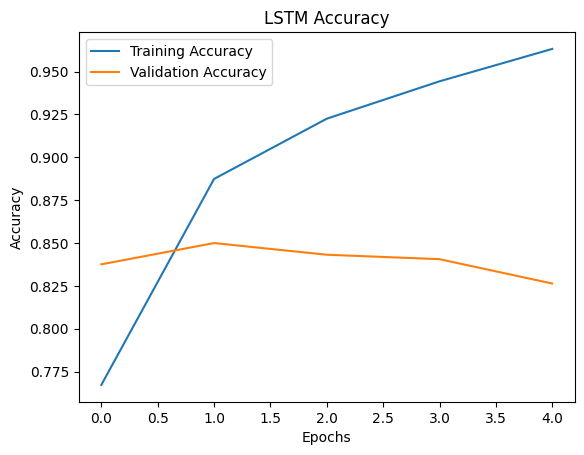

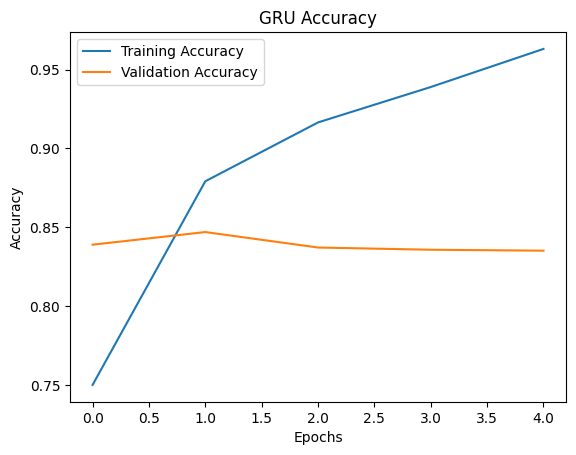

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
max_words = 10000
maxlen = 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(GRU(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test)
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')
gru_model = create_gru_model()
gru_history = gru_model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)
gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test)
print(f'GRU Model Accuracy: {gru_accuracy:.4f}')